# Load the data

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import yaml
from yaml.loader import SafeLoader

# Set the style for seaborn plots
sns.set(style='whitegrid')



# Load path from current dir
with open("../configs/paths/default.yaml") as f:
    cfg = yaml.load(f, Loader=SafeLoader)
    path = cfg["current_dir"]
    path = path.replace("${paths.root_dir}", "..")
    path += "/"


# Import mu and sigma
mu_train = torch.load(path + 'mu_train.pt')
sigma_train = torch.exp(torch.load(path + 'log_sigma_train.pt'))

mu_test = torch.load(path + 'mu_test.pt')
sigma_test = torch.exp(torch.load(path + 'log_sigma_test.pt'))

mu = torch.cat([mu_train, mu_test])
sigma = torch.exp(torch.cat([sigma_train, sigma_test]))

# Plot distribution of mu and sigma over our dataset

In [14]:
# Function to create histograms for each coordinate
def plot_histograms(data, title, n_cols=4, figsize=(16, 8)):
    n_rows = int(np.ceil(data.shape[1] / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    plt.suptitle(title, fontsize=20)

    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]
        if i < data.shape[1]:
            sns.histplot(data[:, i], bins=30, kde=True, color='steelblue', ax=ax)
            ax.set_title(f'Coordinate {i}')
        else:
            ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_histograms_compare(data_train, data_test, title, n_cols=4, figsize=(16, 8)):
    n_rows = int(np.ceil(data_train.shape[1] / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    plt.suptitle(title, fontsize=20)

    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]
        if i < data_train.shape[1]:
            sns.histplot(data_train[:, i], bins=30, kde=True, color='steelblue', ax=ax, label='Train')
            sns.histplot(data_test[:, i], bins=30, kde=True, color='orange', ax=ax, label='Test')
            ax.set_title(f'Coordinate {i}')
            ax.legend()
        else:
            ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

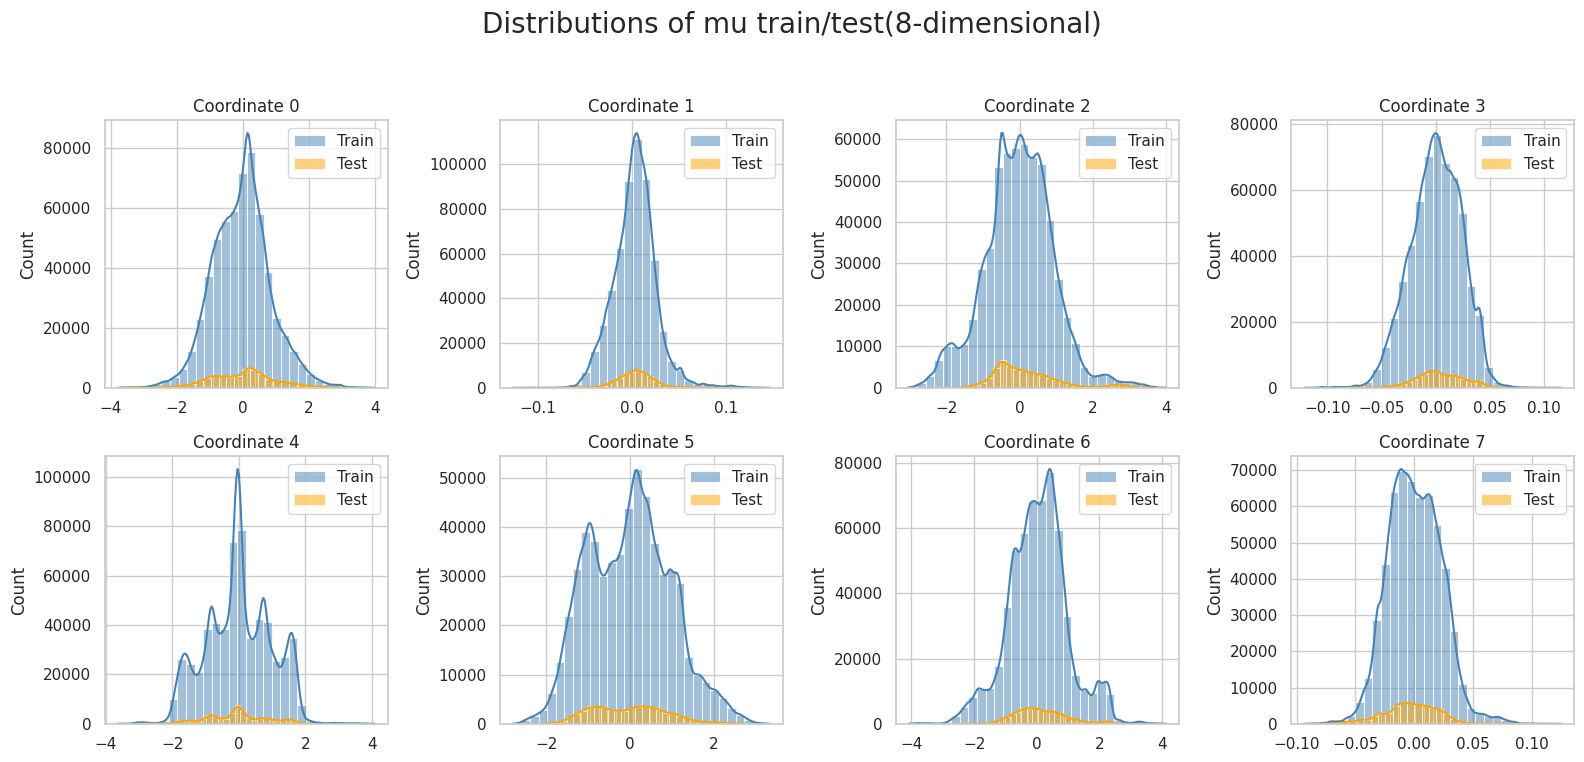

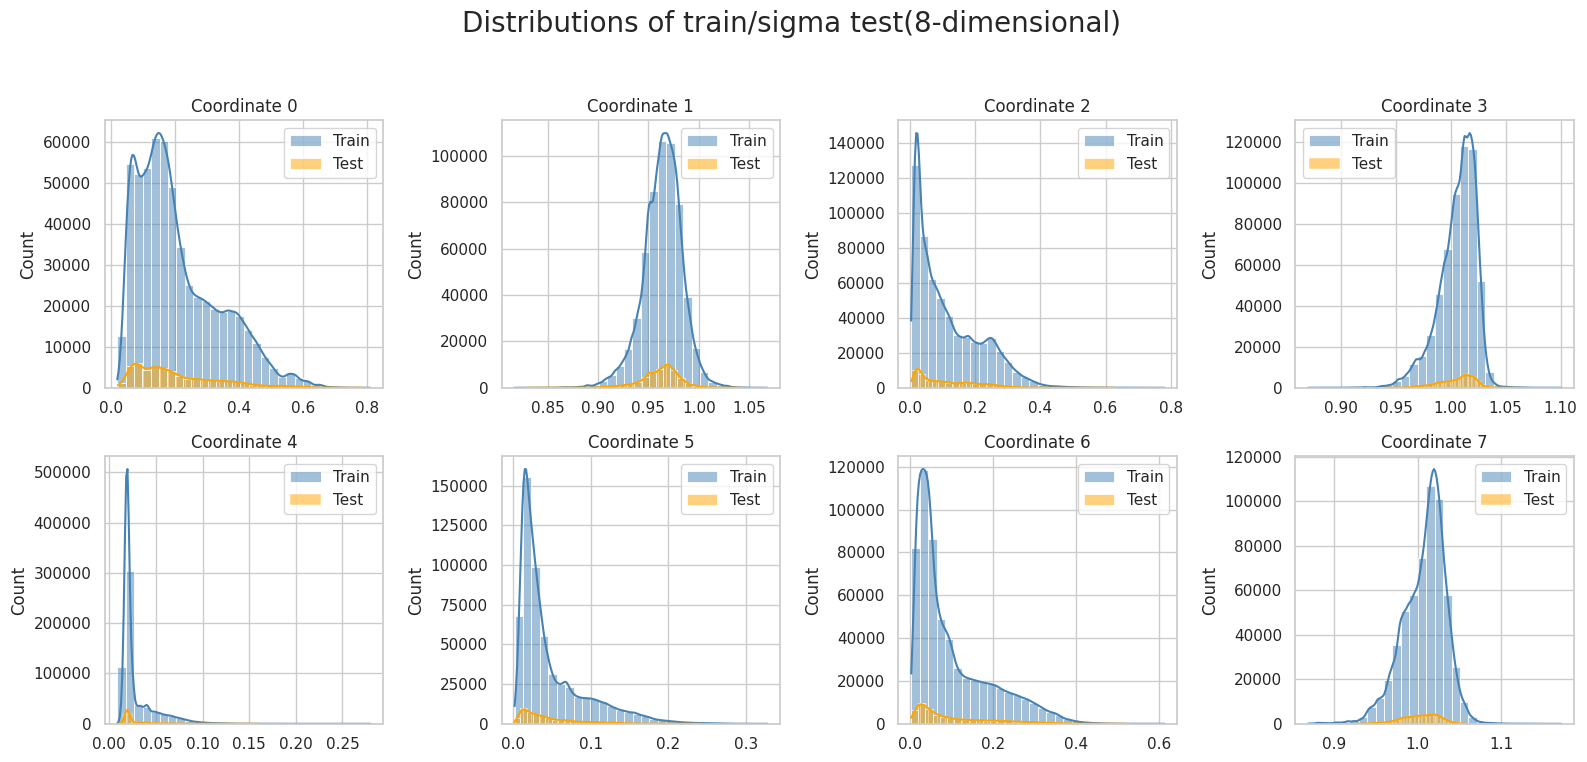

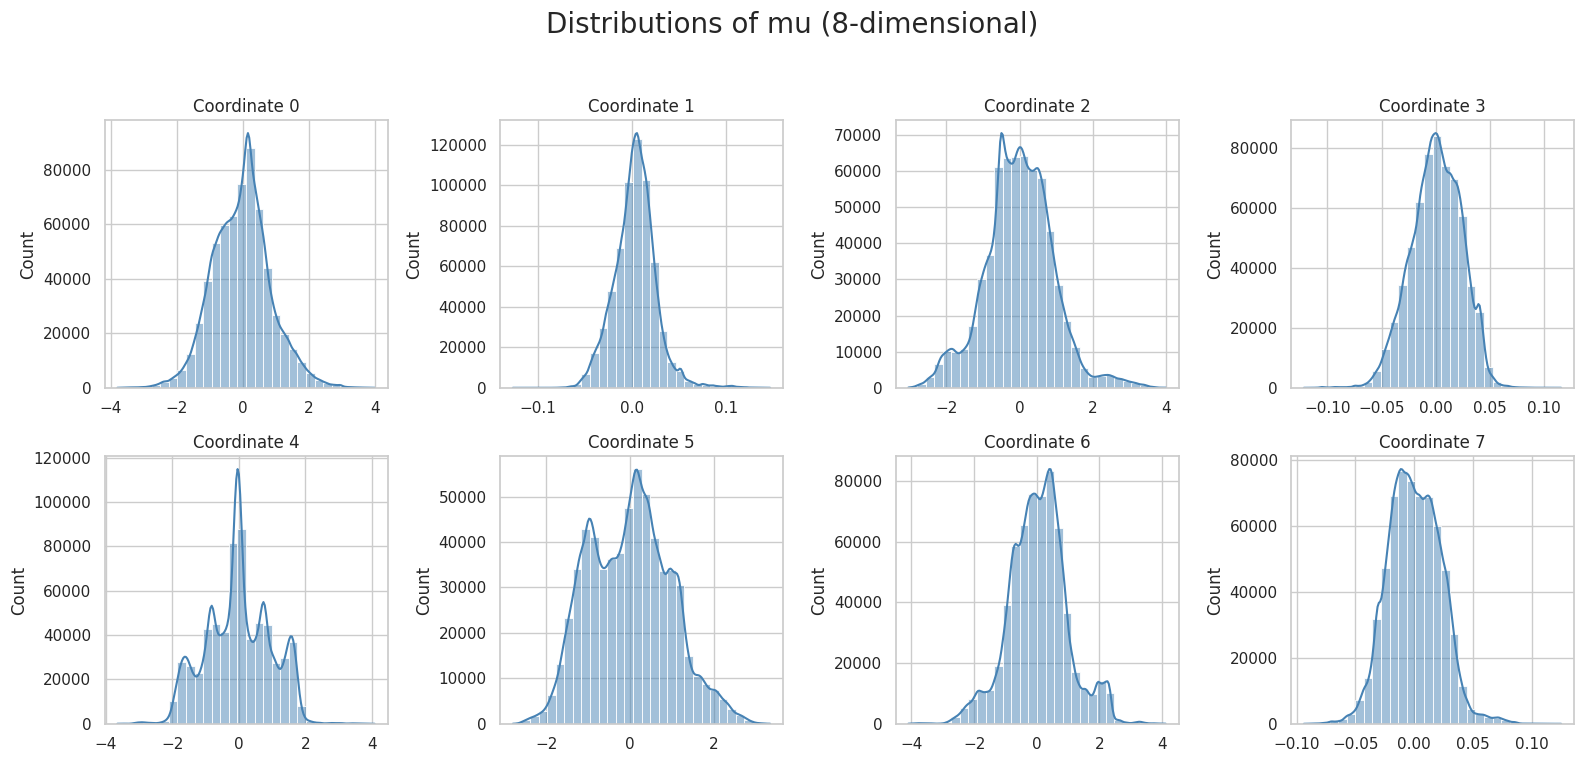

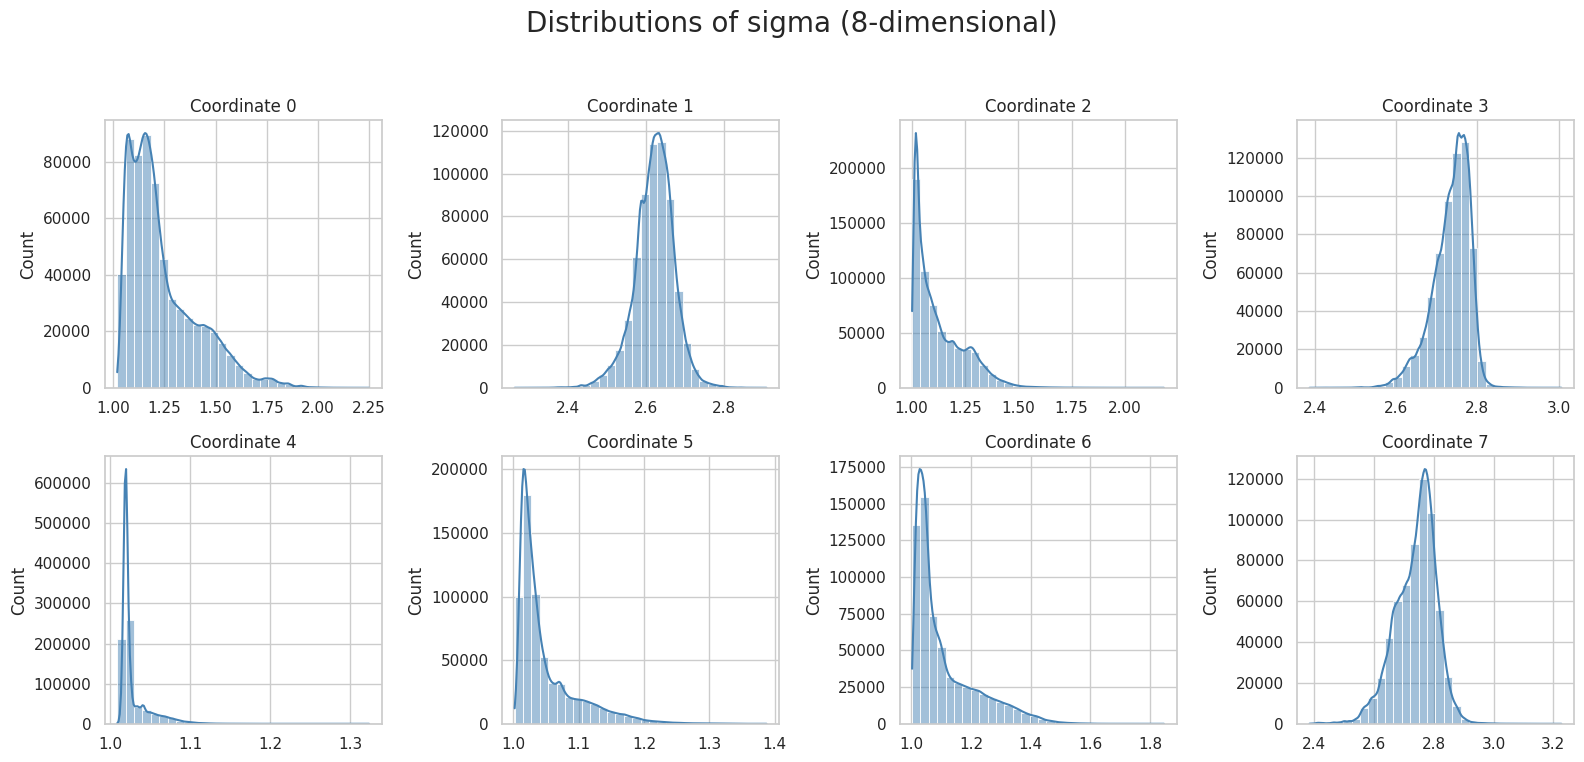

In [15]:
# Plot histograms for mu and sigma
plot_histograms_compare(mu_train, mu_test, f'Distributions of mu train/test({len(mu[0])}-dimensional)')
plot_histograms_compare(sigma_train, sigma_test, f'Distributions of train/sigma test({len(mu[0])}-dimensional)')

plot_histograms(mu, f'Distributions of mu ({len(mu[0])}-dimensional)')
plot_histograms(sigma, f'Distributions of sigma ({len(mu[0])}-dimensional)')

# Relationship between the predicted mus and sigmas

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

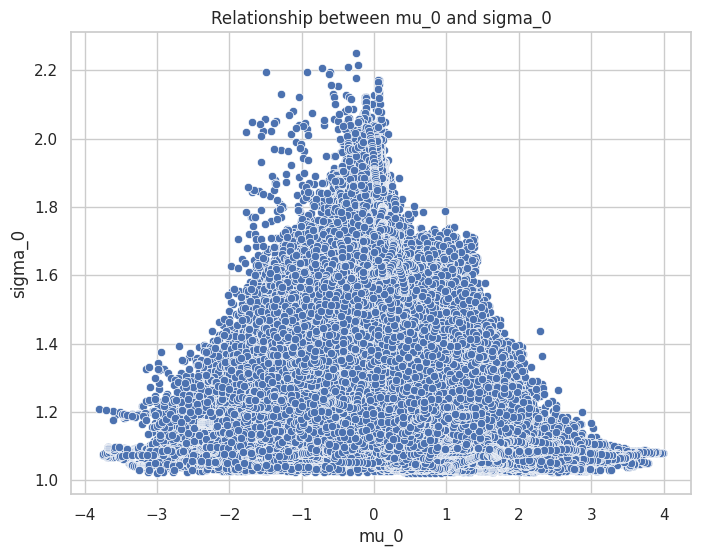

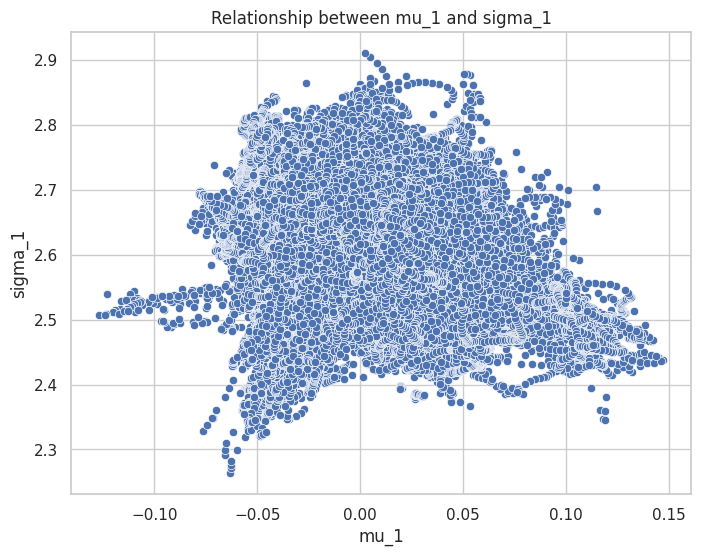

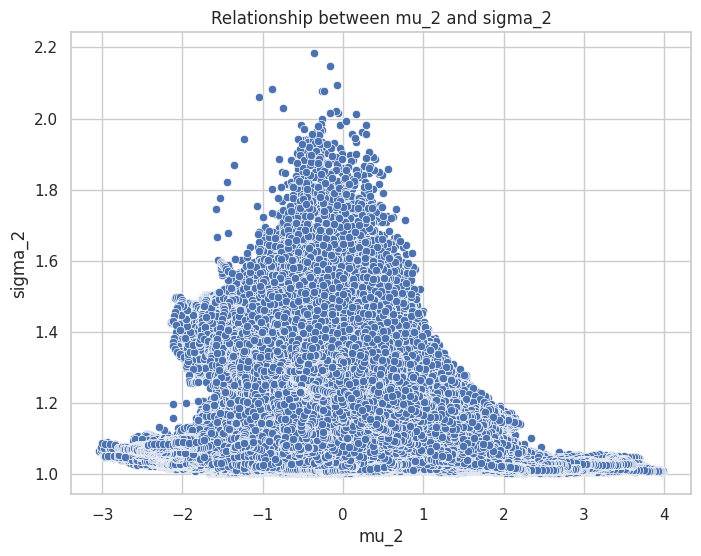

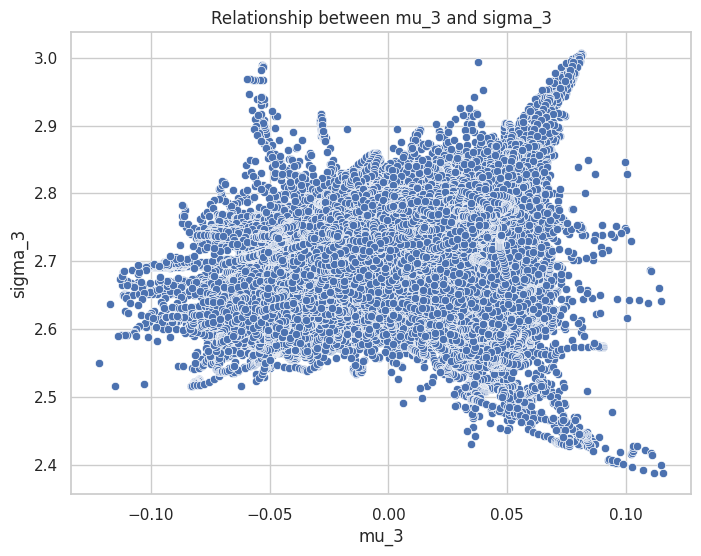

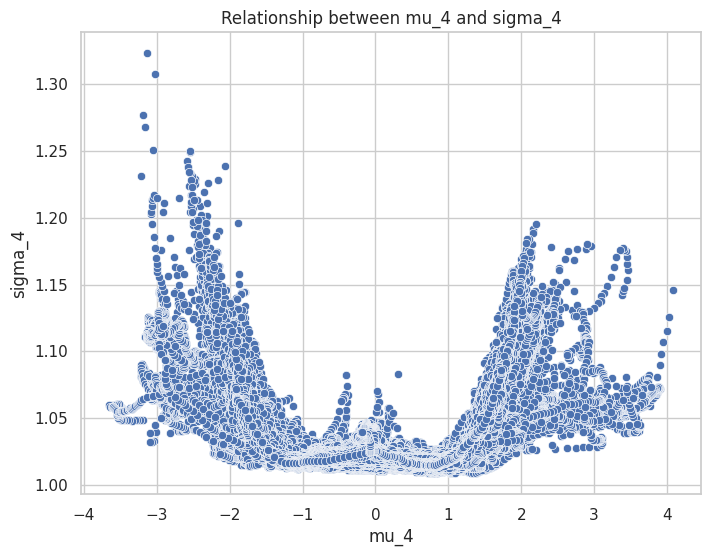

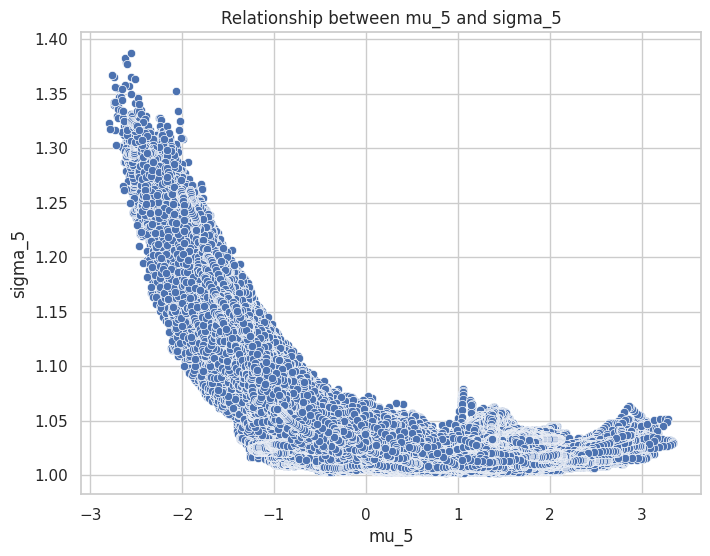

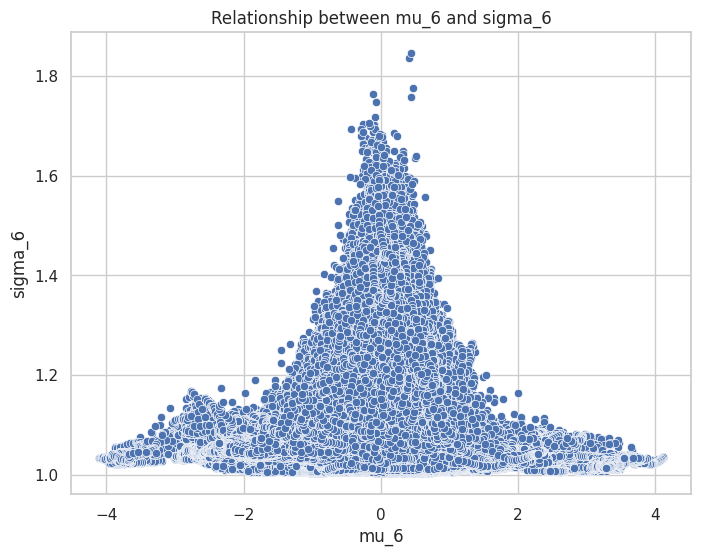

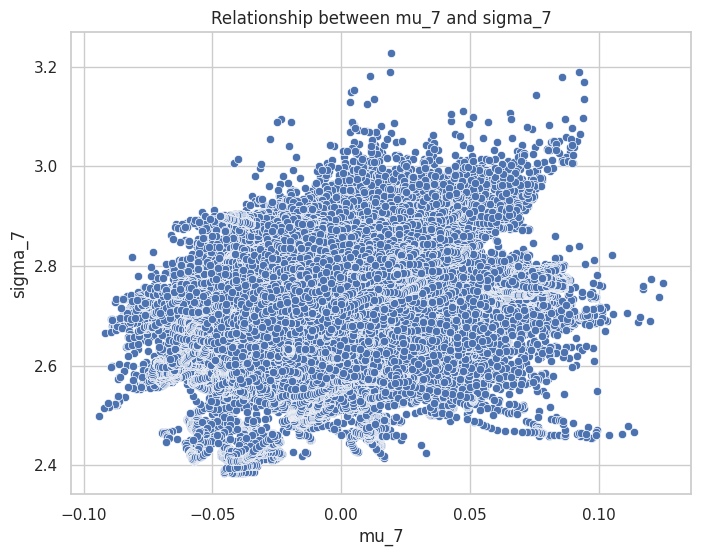

In [17]:
for i in range(mu.shape[1]):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=mu[:, i], y=sigma[:, i])
    plt.xlabel(f"mu_{i}")
    plt.ylabel(f"sigma_{i}")
    plt.title(f"Relationship between mu_{i} and sigma_{i}")
    plt.show()

# Correlations between mu coordinates :

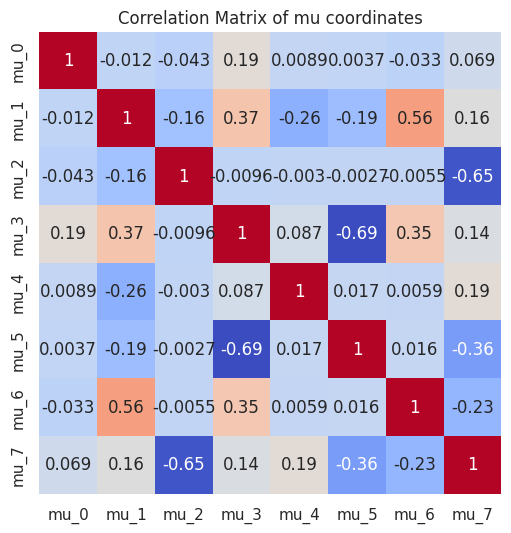

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random mu values (use the same mu_values from the previous example)
#mu_values = np.random.normal(0, 1, size=(1000, 2))

# Compute the correlation matrix
correlation_matrix = np.corrcoef(mu.T)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=False,
            xticklabels=[f"mu_{i}" for i in range(mu.shape[1])],
            yticklabels=[f"mu_{i}" for i in range(mu.shape[1])])
plt.title('Correlation Matrix of mu coordinates')
plt.show()

In [19]:
np.linalg.norm(correlation_matrix)

3.4385647556696424